In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train', 'test', 'train.csv', 'sample_submission.csv']


In [2]:
train_idx=pd.read_csv('../input/train.csv')
HEIGH=512#image.shape[1]
WIDTH=512#image.shape[2]
CHANEL=1#image.shape[3]
print(train_idx.shape)
print(train_idx[0:5])
#we treat this like unet arquitect and like a mask we replace target to 0 to 27 outputs from 0 to 1 values
NUM_CLASSES=28
y_df=[[int(i) for i in s.split()] for s in train_idx['Target']]



y_df_final=np.zeros((train_idx.shape[0],NUM_CLASSES)).astype(int)

for i,x in enumerate(y_df):
    for val in x:
        #print(x,val,i)    
        y_df_final[i,val]=1
print(y_df_final[1])   
print(y_df_final.shape)

(31072, 2)
                                     Id   Target
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18
[1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(31072, 28)


Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


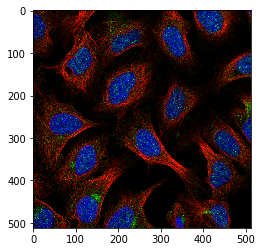

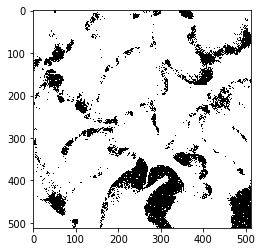

(512, 512, 3)
(512, 512, 3)


In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img#,save_img
import matplotlib.pyplot as plt
from skimage import util

def open_rgb(path):
    name="../input/train/{}_green.png".format(path)
    G=(np.array(load_img(name, grayscale=True))) 
    name="../input/train/{}_blue.png".format(path)
    B=(np.array(load_img(name, grayscale=True))) 
    #name="../input/train/{}_yellow.png".format(np.squeeze(Xdata_set[idx]))
    #Y=downsample(np.array(load_img(name, grayscale=True))) / 255
    name="../input/train/{}_red.png".format(path)
    R=(np.array(load_img(name, grayscale=True))) 
    image=np.concatenate((R.reshape(HEIGH,WIDTH,1),G.reshape(HEIGH,WIDTH,1),B.reshape(HEIGH,WIDTH,1)),axis=2)                    
    return np.array(image,dtype="uint8")

def get_mask(im):
    image = np.zeros((HEIGH,WIDTH,3), dtype="uint8")    
    image[np.where((im==[0,0,0]).all(axis=2))] = [255,255,255]
    image=util.invert((image))    
    return image

im=open_rgb(train_idx.values[12][0])    
mask=get_mask(im)

plt.imshow(im)
plt.show()

plt.imshow(mask)
plt.show()

#plt.imshow(mask.reshape(512,512))
#plt.show()
print(im.shape)
print(mask.shape)

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_idx, y_df_final, test_size=0.08, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [18]:
def keras_ae_imageV2(Xdata_set,ydata_set,batch_size):
        while True:
            random_indexes = np.random.choice(len(Xdata_set), batch_size)
            batch_images = np.empty((batch_size, HEIGH, WIDTH, 3))
            #batch_mask = np.empty((batch_size, HEIGH, WIDTH, 3))
            batch_labels = np.zeros((batch_size, 28))
        
            for x in range(batch_size):            
                for i, idx in enumerate(random_indexes):
                    image=open_rgb(Xdata_set.values[idx][0])
                    mask=get_mask(image)
                    batch_images[i] =image/255
             #       batch_mask[i] =mask/255
                    batch_labels[i]=ydata_set[idx]
            yield batch_images,batch_labels
    

ret,_=  next(keras_ae_image(train_idx,y_df_final,1)  )
print(ret[0].shape)
print(ret[1].shape)
print(_.shape)

def keras_ae_image(Xdata_set,ydata_set,batch_size):
        while True:
            random_indexes = np.random.choice(len(Xdata_set), batch_size)
            batch_images = np.empty((batch_size, HEIGH, WIDTH, 3))
            batch_mask = np.empty((batch_size, HEIGH, WIDTH, 3))
            batch_labels = np.zeros((batch_size, 28))
        
            for x in range(batch_size):            
                for i, idx in enumerate(random_indexes):
                    image=open_rgb(Xdata_set.values[idx][0])
                    mask=get_mask(image)
                    batch_images[i] =image/255
                    batch_mask[i] =mask/255
                    batch_labels[i]=ydata_set[idx]
            yield [batch_images,batch_mask],batch_labels
    

ret,_=  next(keras_ae_image(train_idx,y_df_final,1)  )
print(ret[0].shape)
print(ret[1].shape)
print(_.shape)

(1, 512, 512, 3)
(1, 512, 512, 3)
(1, 28)
(1, 512, 512, 3)
(1, 512, 512, 3)
(1, 28)


/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [5]:
import keras
from keras import backend as K
import tensorflow as tf
from keras.models import Model
from keras.layers import merge,Input,Dense, concatenate, Conv2D, MaxPooling2D, UpSampling2D, Reshape, core, Dropout,Convolution2D,Activation,Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras.utils.vis_utils import plot_model as plot
from keras.optimizers import SGD

def f1_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

def bce_f1_loss(y_true, y_pred):    
    return K.binary_crossentropy(y_true,y_pred)+f1_loss(y_true,y_pred)


####DUMMY MODELS IGNORE THIS MODELS
def part3():
    minput=Input(shape=(512,512,3))
    x=Conv2D(32,(3,3))(minput)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2, 2))(x)
    x=Conv2D(32,(3,3))(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2, 2))(x)
    x=Conv2D(64,(3,3))(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2, 2))(x)
    x=Conv2D(64,(3,3))(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2, 2))(x)
    x=Conv2D(128,(3,3))(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2, 2))(x)
    x=Conv2D(128,(3,3))(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2, 2))(x)

    x=Flatten()(x)
    return minput,x


#Input2,model2=part3()
#Input3,model3=part3()
#x = keras.layers.concatenate([model2,model3])
# We stack a deep densely-connected network on top
#x = Dense(1024, activation='relu')(x)
#x = Dense(1024, activation='relu')(x)
#x = Dense(1024, activation='relu')(x)
#main_output = Dense(NUM_CLASSES, activation='sigmoid', name='main_output')(x)
#model = Model(inputs=[ Input2,Input3], outputs=main_output)
#model.summary()
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','binary_crossentropy',f1_loss,bce_f1_loss])


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 510, 510, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 510, 510, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
activation

In [33]:
'''DenseNet models for Keras.
# Reference
- [Densely Connected Convolutional Networks](https://arxiv.org/pdf/1608.06993.pdf)
- [The One Hundred Layers Tiramisu: Fully Convolutional DenseNets for Semantic Segmentation](https://arxiv.org/pdf/1611.09326.pdf)
'''
from keras import backend as K
from keras.engine import Layer
from keras.utils.generic_utils import get_custom_objects
from keras.backend import normalize_data_format

if K.backend() == 'theano':
    import theano_backend as K_BACKEND
else:
    import tensorflow as K_BACKEND

class SubPixelUpscaling(Layer):
    """ Sub-pixel convolutional upscaling layer based on the paper "Real-Time Single Image
    and Video Super-Resolution Using an Efficient Sub-Pixel Convolutional Neural Network"
    (https://arxiv.org/abs/1609.05158).
    This layer requires a Convolution2D prior to it, having output filters computed according to
    the formula :
        filters = k * (scale_factor * scale_factor)
        where k = a user defined number of filters (generally larger than 32)
              scale_factor = the upscaling factor (generally 2)
    This layer performs the depth to space operation on the convolution filters, and returns a
    tensor with the size as defined below.
    # Example :
    ```python
        # A standard subpixel upscaling block
        x = Convolution2D(256, 3, 3, padding='same', activation='relu')(...)
        u = SubPixelUpscaling(scale_factor=2)(x)
        [Optional]
        x = Convolution2D(256, 3, 3, padding='same', activation='relu')(u)
    ```
        In practice, it is useful to have a second convolution layer after the
        SubPixelUpscaling layer to speed up the learning process.
        However, if you are stacking multiple SubPixelUpscaling blocks, it may increase
        the number of parameters greatly, so the Convolution layer after SubPixelUpscaling
        layer can be removed.
    # Arguments
        scale_factor: Upscaling factor.
        data_format: Can be None, 'channels_first' or 'channels_last'.
    # Input shape
        4D tensor with shape:
        `(samples, k * (scale_factor * scale_factor) channels, rows, cols)` if data_format='channels_first'
        or 4D tensor with shape:
        `(samples, rows, cols, k * (scale_factor * scale_factor) channels)` if data_format='channels_last'.
    # Output shape
        4D tensor with shape:
        `(samples, k channels, rows * scale_factor, cols * scale_factor))` if data_format='channels_first'
        or 4D tensor with shape:
        `(samples, rows * scale_factor, cols * scale_factor, k channels)` if data_format='channels_last'.
    """

    def __init__(self, scale_factor=2, data_format=None, **kwargs):
        super(SubPixelUpscaling, self).__init__(**kwargs)

        self.scale_factor = scale_factor
        self.data_format = normalize_data_format(data_format)

    def build(self, input_shape):
        pass

    def call(self, x, mask=None):
        y = K_BACKEND.depth_to_space(x, self.scale_factor, self.data_format)
        return y

    def compute_output_shape(self, input_shape):
        if self.data_format == 'channels_first':
            b, k, r, c = input_shape
            return (b, k // (self.scale_factor ** 2), r * self.scale_factor, c * self.scale_factor)
        else:
            b, r, c, k = input_shape
            return (b, r * self.scale_factor, c * self.scale_factor, k // (self.scale_factor ** 2))

    def get_config(self):
        config = {'scale_factor': self.scale_factor,
                  'data_format': self.data_format}
        base_config = super(SubPixelUpscaling, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


get_custom_objects().update({'SubPixelUpscaling': SubPixelUpscaling})


import warnings

from keras.models import Model
from keras.layers.core import Dense, Dropout, Activation, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers.pooling import AveragePooling2D, MaxPooling2D
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model, convert_dense_weights_data_format
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
from keras_applications.imagenet_utils import decode_predictions
import keras.backend as K



DENSENET_121_WEIGHTS_PATH = r'https://github.com/titu1994/DenseNet/releases/download/v3.0/DenseNet-BC-121-32.h5'
DENSENET_161_WEIGHTS_PATH = r'https://github.com/titu1994/DenseNet/releases/download/v3.0/DenseNet-BC-161-48.h5'
DENSENET_169_WEIGHTS_PATH = r'https://github.com/titu1994/DenseNet/releases/download/v3.0/DenseNet-BC-169-32.h5'
DENSENET_121_WEIGHTS_PATH_NO_TOP = r'https://github.com/titu1994/DenseNet/releases/download/v3.0/DenseNet-BC-121-32-no-top.h5'
DENSENET_161_WEIGHTS_PATH_NO_TOP = r'https://github.com/titu1994/DenseNet/releases/download/v3.0/DenseNet-BC-161-48-no-top.h5'
DENSENET_169_WEIGHTS_PATH_NO_TOP = r'https://github.com/titu1994/DenseNet/releases/download/v3.0/DenseNet-BC-169-32-no-top.h5'

def preprocess_input(x, data_format=None):
    """Preprocesses a tensor encoding a batch of images.
    # Arguments
        x: input Numpy tensor, 4D.
        data_format: data format of the image tensor.
    # Returns
        Preprocessed tensor.
    """
    if data_format is None:
        data_format = K.image_data_format()
    assert data_format in {'channels_last', 'channels_first'}

    if data_format == 'channels_first':
        if x.ndim == 3:
            # 'RGB'->'BGR'
            x = x[::-1, ...]
            # Zero-center by mean pixel
            x[0, :, :] -= 103.939
            x[1, :, :] -= 116.779
            x[2, :, :] -= 123.68
        else:
            x = x[:, ::-1, ...]
            x[:, 0, :, :] -= 103.939
            x[:, 1, :, :] -= 116.779
            x[:, 2, :, :] -= 123.68
    else:
        # 'RGB'->'BGR'
        x = x[..., ::-1]
        # Zero-center by mean pixel
        x[..., 0] -= 103.939
        x[..., 1] -= 116.779
        x[..., 2] -= 123.68

    x *= 0.017 # scale values

    return x


def DenseNet(input_shape=None, depth=40, nb_dense_block=3, growth_rate=12, nb_filter=-1, nb_layers_per_block=-1,
             bottleneck=False, reduction=0.0, dropout_rate=0.0, weight_decay=1e-4, subsample_initial_block=False,
             include_top=True, weights=None, input_tensor=None,
             classes=10, activation='softmax'):
    '''Instantiate the DenseNet architecture,
        optionally loading weights pre-trained
        on CIFAR-10. Note that when using TensorFlow,
        for best performance you should set
        `image_data_format='channels_last'` in your Keras config
        at ~/.keras/keras.json.
        The model and the weights are compatible with both
        TensorFlow and Theano. The dimension ordering
        convention used by the model is the one
        specified in your Keras config file.
        # Arguments
            input_shape: optional shape tuple, only to be specified
                if `include_top` is False (otherwise the input shape
                has to be `(32, 32, 3)` (with `channels_last` dim ordering)
                or `(3, 32, 32)` (with `channels_first` dim ordering).
                It should have exactly 3 inputs channels,
                and width and height should be no smaller than 8.
                E.g. `(200, 200, 3)` would be one valid value.
            depth: number or layers in the DenseNet
            nb_dense_block: number of dense blocks to add to end (generally = 3)
            growth_rate: number of filters to add per dense block
            nb_filter: initial number of filters. -1 indicates initial
                number of filters is 2 * growth_rate
            nb_layers_per_block: number of layers in each dense block.
                Can be a -1, positive integer or a list.
                If -1, calculates nb_layer_per_block from the network depth.
                If positive integer, a set number of layers per dense block.
                If list, nb_layer is used as provided. Note that list size must
                be (nb_dense_block + 1)
            bottleneck: flag to add bottleneck blocks in between dense blocks
            reduction: reduction factor of transition blocks.
                Note : reduction value is inverted to compute compression.
            dropout_rate: dropout rate
            weight_decay: weight decay rate
            subsample_initial_block: Set to True to subsample the initial convolution and
                add a MaxPool2D before the dense blocks are added.
            include_top: whether to include the fully-connected
                layer at the top of the network.
            weights: one of `None` (random initialization) or
                'imagenet' (pre-training on ImageNet)..
            input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
                to use as image input for the model.
            classes: optional number of classes to classify images
                into, only to be specified if `include_top` is True, and
                if no `weights` argument is specified.
            activation: Type of activation at the top layer. Can be one of 'softmax' or 'sigmoid'.
                Note that if sigmoid is used, classes must be 1.
        # Returns
            A Keras model instance.
        '''

    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `cifar10` '
                         '(pre-training on CIFAR-10).')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as ImageNet with `include_top`'
                         ' as true, `classes` should be 1000')

    if activation not in ['softmax', 'sigmoid']:
        raise ValueError('activation must be one of "softmax" or "sigmoid"')

    #if activation == 'sigmoid' and classes != 1:
     #   raise ValueError('sigmoid activation can only be used when classes = 1')

    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=32,
                                      min_size=8,
                                      data_format=K.image_data_format(),
                                      require_flatten=include_top)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    x = __create_dense_net(classes, img_input, include_top, depth, nb_dense_block,
                           growth_rate, nb_filter, nb_layers_per_block, bottleneck, reduction,
                           dropout_rate, weight_decay, subsample_initial_block, activation)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    #model = Model(inputs, x, name='densenet')

    # load weights

    return inputs,x
    #return model


def DenseNetFCN(input_shape, nb_dense_block=5, growth_rate=16, nb_layers_per_block=4,
                reduction=0.0, dropout_rate=0.0, weight_decay=1e-4, init_conv_filters=48,
                include_top=True, weights=None, input_tensor=None, classes=1, activation='softmax',
                upsampling_conv=128, upsampling_type='deconv'):
    '''Instantiate the DenseNet FCN architecture.
        Note that when using TensorFlow,
        for best performance you should set
        `image_data_format='channels_last'` in your Keras config
        at ~/.keras/keras.json.
        # Arguments
            nb_dense_block: number of dense blocks to add to end (generally = 3)
            growth_rate: number of filters to add per dense block
            nb_layers_per_block: number of layers in each dense block.
                Can be a positive integer or a list.
                If positive integer, a set number of layers per dense block.
                If list, nb_layer is used as provided. Note that list size must
                be (nb_dense_block + 1)
            reduction: reduction factor of transition blocks.
                Note : reduction value is inverted to compute compression.
            dropout_rate: dropout rate
            init_conv_filters: number of layers in the initial convolution layer
            include_top: whether to include the fully-connected
                layer at the top of the network.
            weights: one of `None` (random initialization) or
                'cifar10' (pre-training on CIFAR-10)..
            input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
                to use as image input for the model.
            input_shape: optional shape tuple, only to be specified
                if `include_top` is False (otherwise the input shape
                has to be `(32, 32, 3)` (with `channels_last` dim ordering)
                or `(3, 32, 32)` (with `channels_first` dim ordering).
                It should have exactly 3 inputs channels,
                and width and height should be no smaller than 8.
                E.g. `(200, 200, 3)` would be one valid value.
            classes: optional number of classes to classify images
                into, only to be specified if `include_top` is True, and
                if no `weights` argument is specified.
            activation: Type of activation at the top layer. Can be one of 'softmax' or 'sigmoid'.
                Note that if sigmoid is used, classes must be 1.
            upsampling_conv: number of convolutional layers in upsampling via subpixel convolution
            upsampling_type: Can be one of 'upsampling', 'deconv' and
                'subpixel'. Defines type of upsampling algorithm used.
            batchsize: Fixed batch size. This is a temporary requirement for
                computation of output shape in the case of Deconvolution2D layers.
                Parameter will be removed in next iteration of Keras, which infers
                output shape of deconvolution layers automatically.
        # Returns
            A Keras model instance.
    '''

    if weights not in {None}:
        raise ValueError('The `weights` argument should be '
                         '`None` (random initialization) as no '
                         'model weights are provided.')

    upsampling_type = upsampling_type.lower()

    if upsampling_type not in ['upsampling', 'deconv', 'subpixel']:
        raise ValueError('Parameter "upsampling_type" must be one of "upsampling", '
                         '"deconv" or "subpixel".')

    if input_shape is None:
        raise ValueError('For fully convolutional models, input shape must be supplied.')

    if type(nb_layers_per_block) is not list and nb_dense_block < 1:
        raise ValueError('Number of dense layers per block must be greater than 1. Argument '
                         'value was %d.' % (nb_layers_per_block))

    if activation not in ['softmax', 'sigmoid']:
        raise ValueError('activation must be one of "softmax" or "sigmoid"')

    if activation == 'sigmoid' and classes != 1:
        raise ValueError('sigmoid activation can only be used when classes = 1')

    # Determine proper input shape
    min_size = 2 ** nb_dense_block

    if K.image_data_format() == 'channels_first':
        if input_shape is not None:
            if ((input_shape[1] is not None and input_shape[1] < min_size) or
                    (input_shape[2] is not None and input_shape[2] < min_size)):
                raise ValueError('Input size must be at least ' +
                                 str(min_size) + 'x' + str(min_size) + ', got '
                                                                       '`input_shape=' + str(input_shape) + '`')
        else:
            input_shape = (classes, None, None)
    else:
        if input_shape is not None:
            if ((input_shape[0] is not None and input_shape[0] < min_size) or
                    (input_shape[1] is not None and input_shape[1] < min_size)):
                raise ValueError('Input size must be at least ' +
                                 str(min_size) + 'x' + str(min_size) + ', got '
                                                                       '`input_shape=' + str(input_shape) + '`')
        else:
            input_shape = (None, None, classes)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    x = __create_fcn_dense_net(classes, img_input, include_top, nb_dense_block,
                               growth_rate, reduction, dropout_rate, weight_decay,
                               nb_layers_per_block, upsampling_conv, upsampling_type,
                               init_conv_filters, input_shape, activation)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='fcn-densenet')

    return model


def DenseNetImageNet121(input_shape=None,
                        bottleneck=True,
                        reduction=0.5,
                        dropout_rate=0.0,
                        weight_decay=1e-4,
                        include_top=True,
                        weights='imagenet',
                        input_tensor=None,
                        classes=1000,
                        activation='softmax'):
    return DenseNet(input_shape, depth=121, nb_dense_block=4, growth_rate=32, nb_filter=64,
                    nb_layers_per_block=[6, 12, 24, 16], bottleneck=bottleneck, reduction=reduction,
                    dropout_rate=dropout_rate, weight_decay=weight_decay, subsample_initial_block=True,
                    include_top=include_top, weights=weights, input_tensor=input_tensor,
                    classes=classes, activation=activation)


def DenseNetImageNet169(input_shape=None,
                        bottleneck=True,
                        reduction=0.5,
                        dropout_rate=0.0,
                        weight_decay=1e-4,
                        include_top=True,
                        weights='imagenet',
                        input_tensor=None,
                        classes=1000,
                        activation='softmax'):
    return DenseNet(input_shape, depth=169, nb_dense_block=4, growth_rate=32, nb_filter=64,
                    nb_layers_per_block=[6, 12, 32, 32], bottleneck=bottleneck, reduction=reduction,
                    dropout_rate=dropout_rate, weight_decay=weight_decay, subsample_initial_block=True,
                    include_top=include_top, weights=weights, input_tensor=input_tensor,
                    classes=classes, activation=activation)


def DenseNetImageNet201(input_shape=None,
                        bottleneck=True,
                        reduction=0.5,
                        dropout_rate=0.0,
                        weight_decay=1e-4,
                        include_top=True,
                        weights=None,
                        input_tensor=None,
                        classes=1000,
                        activation='softmax'):
    return DenseNet(input_shape, depth=201, nb_dense_block=4, growth_rate=32, nb_filter=64,
                    nb_layers_per_block=[6, 12, 48, 32], bottleneck=bottleneck, reduction=reduction,
                    dropout_rate=dropout_rate, weight_decay=weight_decay, subsample_initial_block=True,
                    include_top=include_top, weights=weights, input_tensor=input_tensor,
                    classes=classes, activation=activation)


def DenseNetImageNet264(input_shape=None,
                        bottleneck=True,
                        reduction=0.5,
                        dropout_rate=0.0,
                        weight_decay=1e-4,
                        include_top=True,
                        weights=None,
                        input_tensor=None,
                        classes=1000,
                        activation='softmax'):
    return DenseNet(input_shape, depth=201, nb_dense_block=4, growth_rate=32, nb_filter=64,
                    nb_layers_per_block=[6, 12, 64, 48], bottleneck=bottleneck, reduction=reduction,
                    dropout_rate=dropout_rate, weight_decay=weight_decay, subsample_initial_block=True,
                    include_top=include_top, weights=weights, input_tensor=input_tensor,
                    classes=classes, activation=activation)


def DenseNetImageNet161(input_shape=None,
                        bottleneck=True,
                        reduction=0.5,
                        dropout_rate=0.0,
                        weight_decay=1e-4,
                        include_top=True,
                        weights='imagenet',
                        input_tensor=None,
                        classes=1000,
                        activation='softmax'):
    return DenseNet(input_shape, depth=161, nb_dense_block=4, growth_rate=48, nb_filter=96,
                    nb_layers_per_block=[6, 12, 36, 24], bottleneck=bottleneck, reduction=reduction,
                    dropout_rate=dropout_rate, weight_decay=weight_decay, subsample_initial_block=True,
                    include_top=include_top, weights=weights, input_tensor=input_tensor,
                    classes=classes, activation=activation)


def __conv_block(ip, nb_filter, bottleneck=False, dropout_rate=None, weight_decay=1e-4):
    ''' Apply BatchNorm, Relu, 3x3 Conv2D, optional bottleneck block and dropout
    Args:
        ip: Input keras tensor
        nb_filter: number of filters
        bottleneck: add bottleneck block
        dropout_rate: dropout rate
        weight_decay: weight decay factor
    Returns: keras tensor with batch_norm, relu and convolution2d added (optional bottleneck)
    '''
    concat_axis = 1 if K.image_data_format() == 'channels_first' else -1

    x = BatchNormalization(axis=concat_axis, epsilon=1.1e-5)(ip)
    x = Activation('relu')(x)

    if bottleneck:
        inter_channel = nb_filter * 4  # Obtained from https://github.com/liuzhuang13/DenseNet/blob/master/densenet.lua

        x = Conv2D(inter_channel, (1, 1), kernel_initializer='he_normal', padding='same', use_bias=False,
                   kernel_regularizer=l2(weight_decay))(x)
        x = BatchNormalization(axis=concat_axis, epsilon=1.1e-5)(x)
        x = Activation('relu')(x)

    x = Conv2D(nb_filter, (3, 3), kernel_initializer='he_normal', padding='same', use_bias=False)(x)
    if dropout_rate:
        x = Dropout(dropout_rate)(x)

    return x


def __dense_block(x, nb_layers, nb_filter, growth_rate, bottleneck=False, dropout_rate=None, weight_decay=1e-4,
                  grow_nb_filters=True, return_concat_list=False):
    ''' Build a dense_block where the output of each conv_block is fed to subsequent ones
    Args:
        x: keras tensor
        nb_layers: the number of layers of conv_block to append to the model.
        nb_filter: number of filters
        growth_rate: growth rate
        bottleneck: bottleneck block
        dropout_rate: dropout rate
        weight_decay: weight decay factor
        grow_nb_filters: flag to decide to allow number of filters to grow
        return_concat_list: return the list of feature maps along with the actual output
    Returns: keras tensor with nb_layers of conv_block appended
    '''
    concat_axis = 1 if K.image_data_format() == 'channels_first' else -1

    x_list = [x]

    for i in range(nb_layers):
        cb = __conv_block(x, growth_rate, bottleneck, dropout_rate, weight_decay)
        x_list.append(cb)

        x = concatenate([x, cb], axis=concat_axis)

        if grow_nb_filters:
            nb_filter += growth_rate

    if return_concat_list:
        return x, nb_filter, x_list
    else:
        return x, nb_filter


def __transition_block(ip, nb_filter, compression=1.0, weight_decay=1e-4):
    ''' Apply BatchNorm, Relu 1x1, Conv2D, optional compression, dropout and Maxpooling2D
    Args:
        ip: keras tensor
        nb_filter: number of filters
        compression: calculated as 1 - reduction. Reduces the number of feature maps
                    in the transition block.
        dropout_rate: dropout rate
        weight_decay: weight decay factor
    Returns: keras tensor, after applying batch_norm, relu-conv, dropout, maxpool
    '''
    concat_axis = 1 if K.image_data_format() == 'channels_first' else -1

    x = BatchNormalization(axis=concat_axis, epsilon=1.1e-5)(ip)
    x = Activation('relu')(x)
    x = Conv2D(int(nb_filter * compression), (1, 1), kernel_initializer='he_normal', padding='same', use_bias=False,
               kernel_regularizer=l2(weight_decay))(x)
    x = AveragePooling2D((2, 2), strides=(2, 2))(x)

    return x


def __transition_up_block(ip, nb_filters, type='deconv', weight_decay=1E-4):
    ''' SubpixelConvolutional Upscaling (factor = 2)
    Args:
        ip: keras tensor
        nb_filters: number of layers
        type: can be 'upsampling', 'subpixel', 'deconv'. Determines type of upsampling performed
        weight_decay: weight decay factor
    Returns: keras tensor, after applying upsampling operation.
    '''

    if type == 'upsampling':
        x = UpSampling2D()(ip)
    elif type == 'subpixel':
        x = Conv2D(nb_filters, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay),
                   use_bias=False, kernel_initializer='he_normal')(ip)
        x = SubPixelUpscaling(scale_factor=2)(x)
        x = Conv2D(nb_filters, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay),
                   use_bias=False, kernel_initializer='he_normal')(x)
    else:
        x = Conv2DTranspose(nb_filters, (3, 3), activation='relu', padding='same', strides=(2, 2),
                            kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay))(ip)

    return x


def __create_dense_net(nb_classes, img_input, include_top, depth=40, nb_dense_block=3, growth_rate=12, nb_filter=-1,
                       nb_layers_per_block=-1, bottleneck=False, reduction=0.0, dropout_rate=None, weight_decay=1e-4,
                       subsample_initial_block=False, activation='softmax'):
    ''' Build the DenseNet model
    Args:
        nb_classes: number of classes
        img_input: tuple of shape (channels, rows, columns) or (rows, columns, channels)
        include_top: flag to include the final Dense layer
        depth: number or layers
        nb_dense_block: number of dense blocks to add to end (generally = 3)
        growth_rate: number of filters to add per dense block
        nb_filter: initial number of filters. Default -1 indicates initial number of filters is 2 * growth_rate
        nb_layers_per_block: number of layers in each dense block.
                Can be a -1, positive integer or a list.
                If -1, calculates nb_layer_per_block from the depth of the network.
                If positive integer, a set number of layers per dense block.
                If list, nb_layer is used as provided. Note that list size must
                be (nb_dense_block + 1)
        bottleneck: add bottleneck blocks
        reduction: reduction factor of transition blocks. Note : reduction value is inverted to compute compression
        dropout_rate: dropout rate
        weight_decay: weight decay rate
        subsample_initial_block: Set to True to subsample the initial convolution and
                add a MaxPool2D before the dense blocks are added.
        subsample_initial:
        activation: Type of activation at the top layer. Can be one of 'softmax' or 'sigmoid'.
                Note that if sigmoid is used, classes must be 1.
    Returns: keras tensor with nb_layers of conv_block appended
    '''

    concat_axis = 1 if K.image_data_format() == 'channels_first' else -1

    if reduction != 0.0:
        assert reduction <= 1.0 and reduction > 0.0, 'reduction value must lie between 0.0 and 1.0'

    # layers in each dense block
    if type(nb_layers_per_block) is list or type(nb_layers_per_block) is tuple:
        nb_layers = list(nb_layers_per_block)  # Convert tuple to list

        assert len(nb_layers) == (nb_dense_block), 'If list, nb_layer is used as provided. ' \
                                                   'Note that list size must be (nb_dense_block)'
        final_nb_layer = nb_layers[-1]
        nb_layers = nb_layers[:-1]
    else:
        if nb_layers_per_block == -1:
            assert (depth - 4) % 3 == 0, 'Depth must be 3 N + 4 if nb_layers_per_block == -1'
            count = int((depth - 4) / 3)

            if bottleneck:
                count = count // 2

            nb_layers = [count for _ in range(nb_dense_block)]
            final_nb_layer = count
        else:
            final_nb_layer = nb_layers_per_block
            nb_layers = [nb_layers_per_block] * nb_dense_block

    # compute initial nb_filter if -1, else accept users initial nb_filter
    if nb_filter <= 0:
        nb_filter = 2 * growth_rate

    # compute compression factor
    compression = 1.0 - reduction

    # Initial convolution
    if subsample_initial_block:
        initial_kernel = (7, 7)
        initial_strides = (2, 2)
    else:
        initial_kernel = (3, 3)
        initial_strides = (1, 1)

    x = Conv2D(nb_filter, initial_kernel, kernel_initializer='he_normal', padding='same',
               strides=initial_strides, use_bias=False, kernel_regularizer=l2(weight_decay))(img_input)

    if subsample_initial_block:
        x = BatchNormalization(axis=concat_axis, epsilon=1.1e-5)(x)
        x = Activation('relu')(x)
        x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Add dense blocks
    for block_idx in range(nb_dense_block - 1):
        x, nb_filter = __dense_block(x, nb_layers[block_idx], nb_filter, growth_rate, bottleneck=bottleneck,
                                     dropout_rate=dropout_rate, weight_decay=weight_decay)
        # add transition_block
        x = __transition_block(x, nb_filter, compression=compression, weight_decay=weight_decay)
        nb_filter = int(nb_filter * compression)

    # The last dense_block does not have a transition_block
    x, nb_filter = __dense_block(x, final_nb_layer, nb_filter, growth_rate, bottleneck=bottleneck,
                                 dropout_rate=dropout_rate, weight_decay=weight_decay)

    x = BatchNormalization(axis=concat_axis, epsilon=1.1e-5)(x)
    x = Activation('relu')(x)
    x = GlobalAveragePooling2D()(x)

    #if include_top:
        #x = Dense(nb_classes, activation="sigmoid")(x)

    return x


def __create_fcn_dense_net(nb_classes, img_input, include_top, nb_dense_block=5, growth_rate=12,
                           reduction=0.0, dropout_rate=None, weight_decay=1e-4,
                           nb_layers_per_block=4, nb_upsampling_conv=128, upsampling_type='upsampling',
                           init_conv_filters=48, input_shape=None, activation='deconv'):
    ''' Build the DenseNet model
    Args:
        nb_classes: number of classes
        img_input: tuple of shape (channels, rows, columns) or (rows, columns, channels)
        include_top: flag to include the final Dense layer
        nb_dense_block: number of dense blocks to add to end (generally = 3)
        growth_rate: number of filters to add per dense block
        reduction: reduction factor of transition blocks. Note : reduction value is inverted to compute compression
        dropout_rate: dropout rate
        weight_decay: weight decay
        nb_layers_per_block: number of layers in each dense block.
            Can be a positive integer or a list.
            If positive integer, a set number of layers per dense block.
            If list, nb_layer is used as provided. Note that list size must
            be (nb_dense_block + 1)
        nb_upsampling_conv: number of convolutional layers in upsampling via subpixel convolution
        upsampling_type: Can be one of 'upsampling', 'deconv' and 'subpixel'. Defines
            type of upsampling algorithm used.
        input_shape: Only used for shape inference in fully convolutional networks.
        activation: Type of activation at the top layer. Can be one of 'softmax' or 'sigmoid'.
                    Note that if sigmoid is used, classes must be 1.
    Returns: keras tensor with nb_layers of conv_block appended
    '''

    concat_axis = 1 if K.image_data_format() == 'channels_first' else -1

    if concat_axis == 1:  # channels_first dim ordering
        _, rows, cols = input_shape
    else:
        rows, cols, _ = input_shape

    if reduction != 0.0:
        assert reduction <= 1.0 and reduction > 0.0, 'reduction value must lie between 0.0 and 1.0'

    # check if upsampling_conv has minimum number of filters
    # minimum is set to 12, as at least 3 color channels are needed for correct upsampling
    assert nb_upsampling_conv > 12 and nb_upsampling_conv % 4 == 0, 'Parameter `upsampling_conv` number of channels must ' \
                                                                    'be a positive number divisible by 4 and greater ' \
                                                                    'than 12'

    # layers in each dense block
    if type(nb_layers_per_block) is list or type(nb_layers_per_block) is tuple:
        nb_layers = list(nb_layers_per_block)  # Convert tuple to list

        assert len(nb_layers) == (nb_dense_block + 1), 'If list, nb_layer is used as provided. ' \
                                                       'Note that list size must be (nb_dense_block + 1)'

        bottleneck_nb_layers = nb_layers[-1]
        rev_layers = nb_layers[::-1]
        nb_layers.extend(rev_layers[1:])
    else:
        bottleneck_nb_layers = nb_layers_per_block
        nb_layers = [nb_layers_per_block] * (2 * nb_dense_block + 1)

    # compute compression factor
    compression = 1.0 - reduction

    # Initial convolution
    x = Conv2D(init_conv_filters, (7, 7), kernel_initializer='he_normal', padding='same', name='initial_conv2D',
               use_bias=False, kernel_regularizer=l2(weight_decay))(img_input)
    x = BatchNormalization(axis=concat_axis, epsilon=1.1e-5)(x)
    x = Activation('relu')(x)

    nb_filter = init_conv_filters

    skip_list = []

    # Add dense blocks and transition down block
    for block_idx in range(nb_dense_block):
        x, nb_filter = __dense_block(x, nb_layers[block_idx], nb_filter, growth_rate, dropout_rate=dropout_rate,
                                     weight_decay=weight_decay)

        # Skip connection
        skip_list.append(x)

        # add transition_block
        x = __transition_block(x, nb_filter, compression=compression, weight_decay=weight_decay)

        nb_filter = int(nb_filter * compression)  # this is calculated inside transition_down_block

    # The last dense_block does not have a transition_down_block
    # return the concatenated feature maps without the concatenation of the input
    _, nb_filter, concat_list = __dense_block(x, bottleneck_nb_layers, nb_filter, growth_rate,
                                              dropout_rate=dropout_rate, weight_decay=weight_decay,
                                              return_concat_list=True)

    skip_list = skip_list[::-1]  # reverse the skip list

    # Add dense blocks and transition up block
    for block_idx in range(nb_dense_block):
        n_filters_keep = growth_rate * nb_layers[nb_dense_block + block_idx]

        # upsampling block must upsample only the feature maps (concat_list[1:]),
        # not the concatenation of the input with the feature maps (concat_list[0].
        l = concatenate(concat_list[1:], axis=concat_axis)

        t = __transition_up_block(l, nb_filters=n_filters_keep, type=upsampling_type, weight_decay=weight_decay)

        # concatenate the skip connection with the transition block
        x = concatenate([t, skip_list[block_idx]], axis=concat_axis)

        # Dont allow the feature map size to grow in upsampling dense blocks
        x_up, nb_filter, concat_list = __dense_block(x, nb_layers[nb_dense_block + block_idx + 1], nb_filter=growth_rate,
                                                     growth_rate=growth_rate, dropout_rate=dropout_rate,
                                                     weight_decay=weight_decay, return_concat_list=True,
                                                     grow_nb_filters=False)

    if include_top:
        x = Conv2D(nb_classes, (1, 1), activation='linear', padding='same', use_bias=False)(x_up)

        if K.image_data_format() == 'channels_first':
            channel, row, col = input_shape
        else:
            row, col, channel = input_shape

        x = Reshape((row * col, nb_classes))(x)
        x = Activation(activation)(x)
        x = Reshape((row, col, nb_classes))(x)
    else:
        x = x_up

    return x






In [36]:
image_dim = (512, 512, 3)
input1,model1 = DenseNet(classes=28, input_shape=image_dim, depth=40, growth_rate=12, bottleneck=True, reduction=0.5,activation="sigmoid")
input2,model2 = DenseNet(classes=28, input_shape=image_dim, depth=40, growth_rate=12, bottleneck=True, reduction=0.5,activation="sigmoid")

x = keras.layers.concatenate([model1,model2])
# We stack a deep densely-connected network on top
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
main_output = Dense(NUM_CLASSES, activation='sigmoid', name='main_output')(x)
model = Model(inputs=[ input1,input2], outputs=main_output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','binary_crossentropy',f1_loss,bce_f1_loss])

#model.compile(loss=f1_loss, optimizer='adam', metrics=['accuracy','binary_crossentropy',f1_loss,bce_f1_loss])


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv2d_364 (Conv2D)             (None, 512, 512, 24) 648         input_12[0][0]                   
__________________________________________________________________________________________________
conv2d_403 (Conv2D)             (None, 512, 512, 24) 648         input_13[0][0]                   
__________________________________________________________________________________________________
batch_norm

In [ ]:
#go with the model 
model.fit_generator(keras_ae_image(X_train,y_train,1),steps_per_epoch=50,epochs=50,
                    validation_data=next(keras_ae_image(X_test,y_test,10)),
                    validation_steps=10,
                    verbose=1)